# Home 4: Build a CNN for image recognition.

### Name: Navid Ayoobi



## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

170500096/170498071 [==============================] - 4s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    encoded=numpy.zeros((len(y),num_class))
    encoded[range(len(y)),y[:,0]]=1
    return encoded
    

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [77]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

def define_model(dense=50,drop_out=0.5):

  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dropout(drop_out))
  model.add(Dense(dense, activation='relu'))

  model.add(Dense(10, activation='softmax'))

  #model.summary()
  return model

In [79]:
from keras import optimizers
learning_rate = [1e-3,1e-4]
dropout=[0.3,0.5]
dense=[50,100,150]
batch_size=[32,64]


def tuning(num_dense,drop,num_opt,learning_rate,bs): #num_opt: 0=RMSprop 1=Adam
  model=define_model(num_dense,drop)

  if num_opt==0:
    opt=optimizers.RMSprop(lr=learning_rate)
  else:
    opt=optimizers.Adam(lr=learning_rate)

  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['acc'])
  history = model.fit(x_tr, y_tr, batch_size=bs, epochs=30, validation_data=(x_val, y_val),verbose=0)#
  val_acc = history.history['val_acc']
  return val_acc[-1]

val_result=numpy.zeros((48,6))
cntr=0
for dns in dense:
  for dp in dropout:
    for op in range(2):
      for lr in learning_rate:
        for bs in batch_size:
          accuracy=tuning(dns,dp,op,lr,bs)
          val_result[cntr,:]=[dns,dp,op,lr,bs,accuracy]
          cntr+=1

print(val_result)

[[5.00000000e+01 3.00000000e-01 0.00000000e+00 1.00000000e-03
  3.20000000e+01 7.61300027e-01]
 [5.00000000e+01 3.00000000e-01 0.00000000e+00 1.00000000e-03
  6.40000000e+01 7.74200022e-01]
 [5.00000000e+01 3.00000000e-01 0.00000000e+00 1.00000000e-04
  3.20000000e+01 7.31800020e-01]
 [5.00000000e+01 3.00000000e-01 0.00000000e+00 1.00000000e-04
  6.40000000e+01 7.18999982e-01]
 [5.00000000e+01 3.00000000e-01 1.00000000e+00 1.00000000e-03
  3.20000000e+01 7.70600021e-01]
 [5.00000000e+01 3.00000000e-01 1.00000000e+00 1.00000000e-03
  6.40000000e+01 7.47799993e-01]
 [5.00000000e+01 3.00000000e-01 1.00000000e+00 1.00000000e-04
  3.20000000e+01 7.40300000e-01]
 [5.00000000e+01 3.00000000e-01 1.00000000e+00 1.00000000e-04
  6.40000000e+01 7.09999979e-01]
 [5.00000000e+01 5.00000000e-01 0.00000000e+00 1.00000000e-03
  3.20000000e+01 7.76899993e-01]
 [5.00000000e+01 5.00000000e-01 0.00000000e+00 1.00000000e-03
  6.40000000e+01 7.32100010e-01]
 [5.00000000e+01 5.00000000e-01 0.00000000e+00 1.0

In [85]:
idx=numpy.argmax(val_result[:,5])
opt_text=["RMSProp","Adam"]
print("\n dense units: {} \n Drop out: {} \n optimizer: {} \n Learning rate: {} \n batch size:{} \n Validation accuracy: {}"
.format(val_result[idx,0],val_result[idx,1],opt_text[int(val_result[idx,2])],val_result[idx,3],val_result[idx,4],val_result[idx,5]*100))


 dense units: 150.0 
 Drop out: 0.5 
 optimizer: Adam 
 Learning rate: 0.001 
 batch size:32.0 
 Validation accuracy: 79.64000105857849


In [86]:
# For plotting below curve, we train the model with chosen parameters. Of course due to random initialization, the final accuracy can be changed!
model=define_model(150,0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])
history = model.fit(x_tr, y_tr, batch_size=32, epochs=30, validation_data=(x_val, y_val))



Epoch 1/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7902 - acc: 0.3713 - val_loss: 1.3088 - val_acc: 0.5293
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1372 - acc: 0.5935 - val_loss: 1.3399 - val_acc: 0.5345
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9739 - acc: 0.6541 - val_loss: 1.2402 - val_acc: 0.5872
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8927 - acc: 0.6863 - val_loss: 0.9182 - val_acc: 0.6812
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8214 - acc: 0.7100 - val_loss: 0.9612 - val_acc: 0.6706
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7642 - acc: 0.7285 - val_loss: 0.9138 - val_acc: 0.6746
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7082 - acc: 0.7484 - val_loss: 0.8147 - val_acc: 0.7158
Epoch 8/30
1250/1250 [==============================] - 5s 4ms

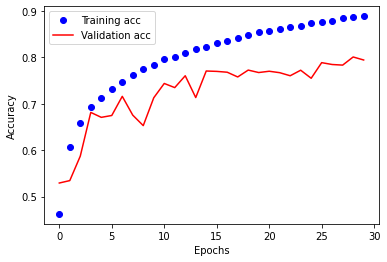

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [89]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

In [90]:
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4113 - acc: 0.8633
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3750 - acc: 0.8705
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3558 - acc: 0.8770
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3507 - acc: 0.8788
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3292 - acc: 0.8855
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3375 - acc: 0.8816
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3226 - acc: 0.8872
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3067 - acc: 0.8925
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2964 - acc: 0.8956
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2893 - acc: 0.9014
Epoch 11/30
1563/1563 [======

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [91]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7506 - acc: 0.7910
loss = 0.7506499290466309
accuracy = 0.7910000085830688


#**We achieved 79.1% accuracy without data augmentation!**

# **Using data augmentation**
The same parameters, obtained from previous section, are used here.

In [99]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True)

train_datagen.fit(x_train)

model=define_model(150,0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

model.fit(train_datagen.flow(x_train, y_train_vec, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=50)








Epoch 1/50
1562/1562 [==============================] - 8s 5ms/step - loss: 1.7203 - acc: 0.3917
Epoch 2/50
1562/1562 [==============================] - 8s 5ms/step - loss: 1.1136 - acc: 0.6013
Epoch 3/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.9525 - acc: 0.6651
Epoch 4/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.8686 - acc: 0.6967
Epoch 5/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.8022 - acc: 0.7195
Epoch 6/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.7572 - acc: 0.7362
Epoch 7/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.7255 - acc: 0.7456
Epoch 8/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.6968 - acc: 0.7547
Epoch 9/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.6587 - acc: 0.7703
Epoch 10/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.6421 - acc: 0.7740
Epoch 11/50
1562/1562 [======

In [100]:
test_datagen = ImageDataGenerator(
    rescale=1./255)
test_datagen.fit(x_test)

loss_and_acc = model.evaluate(test_datagen.flow(x_test, y_test_vec))
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.5380 - acc: 0.8270
loss = 0.5379560589790344
accuracy = 0.8270000219345093


# **We achieved 82.7% accuracy with data augmentation!**
